# Amazon Review of Musical Equipment

   As a consumer in this day and age, I do most of my shopping online. This trend of doing my shopping online created a certain level of skepticism when I buy products due to a few bad experiences I have had with my purchases. Due to this fact, product reviews are extremely important me because they determine if I should purchase a product or not. Such product review data can create a huge impact on the sales of a product from a companies point of view. 

Data;

The data was retrieved from http://jmcauley.ucsd.edu/data/amazon/ by accessing the website. The variables from the dataset that would be utilized are the reviews and the sentiment in the review (positive versus negative).

Use of Specialization;

Techniques intended to be used include use of several plotting techniques to understand the data, use NLP and NLTK (the use of text processing methods such as tokenizations, stop word removal, stemming and vectorizing text via term frequencies (TF) as well as the inverse document frequencies (TF-IDF)). The use of topic modelling would be done with Latent Dirichlet Allocation (LDA) and Sentiment Analysis.
For evaluation, Recall and F1 score would be used in addition to  Receiver Operating Characteristic score and Confusion Matrix 

Product/Business Impact;

This project is valuable because it provides actionable insight on customers reactions to a product. It can assist in better marketing of the product and directed improvement to increase customer satisfaction, which in turn may provide a more favorable view of the product and increase sales. In addition, the model created would assist in predicting whether future reviews are positive or negative towards the product.
Project goals include;

- Properly cleaning the data and using visualization to understand the dataset,  
- Applying at least 2 models to determine process with highest accuracy.
- Creating a Sentiment analysis and a predictive model.

Being able to analyse that data to determine consumers' sentiments of the products, the flaws and even the most enjoyed feature can allow a company to improve on the product, and market it better based on the top feature mentioned.


#### The Dataset

The data contains the following columns:

-asin – ID of the product

-helpful – helpfulness rating of the review, e.g. 2/3

-overall – rating of the product

-reviewText – text of the review

-reviewTime – time of the review (raw)

-reviewerID – ID of the reviewer

-reviewerName – name of the reviewer

-summary – summary of the review

-unixReviewTime – time of the review (unix time)


In [1]:
# Import Packages
import numpy as np
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns
import re

import warnings
warnings.filterwarnings('ignore')

## Exploring the data

Lets import the data

In [2]:
df = pd.read_json('Musical_Instruments_5.json', lines=True)
df.dropna()
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,1384719342,"[0, 0]",5,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600
1,1384719342,"[13, 14]",5,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000
2,1384719342,"[1, 1]",5,The primary job of this device is to block the...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000
3,1384719342,"[0, 0]",5,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000
4,1384719342,"[0, 0]",5,This pop filter is great. It looks and perform...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800


In [3]:
# Start exploring the dataset. Lets take a look at the columns
print(df.columns)

Index(['asin', 'helpful', 'overall', 'reviewText', 'reviewTime', 'reviewerID',
       'reviewerName', 'summary', 'unixReviewTime'],
      dtype='object')


In [4]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
# Data types
df.dtypes

There are 10261 observations and 9 features in this dataset. 



asin              object
helpful           object
overall            int64
reviewText        object
reviewTime        object
reviewerID        object
reviewerName      object
summary           object
unixReviewTime     int64
dtype: object

In [5]:
# Checking for Null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
asin              10261 non-null object
helpful           10261 non-null object
overall           10261 non-null int64
reviewText        10261 non-null object
reviewTime        10261 non-null object
reviewerID        10261 non-null object
reviewerName      10234 non-null object
summary           10261 non-null object
unixReviewTime    10261 non-null int64
dtypes: int64(2), object(7)
memory usage: 721.6+ KB


In [6]:
# Groupby by rating
reviewText_ = df.groupby("overall")

# Summary statistic of all sentimentS
reviewText_.describe()

unixReviewTime                                            \
                 count          mean           std           min   
overall                                                            
1                217.0  1.363610e+09  3.693997e+07  1.141344e+09   
2                250.0  1.361242e+09  3.770940e+07  1.190678e+09   
3                772.0  1.361718e+09  3.633831e+07  1.161389e+09   
4               2084.0  1.359799e+09  3.914760e+07  1.095466e+09   
5               6938.0  1.360608e+09  3.757515e+07  1.096416e+09   

                                                                 
                  25%           50%           75%           max  
overall                                                          
1        1.347926e+09  1.370995e+09  1.390349e+09  1.405210e+09  
2        1.342116e+09  1.369872e+09  1.389506e+09  1.405210e+09  
3        1.343282e+09  1.369008e+09  1.389053e+09  1.405901e+09  
4        1.342915e+09  1.369138e+09  1.388707e+09  1.405987e+09  
5        1.343606e+09  1.367971e+09  1.388945e+09  1.405901e+09

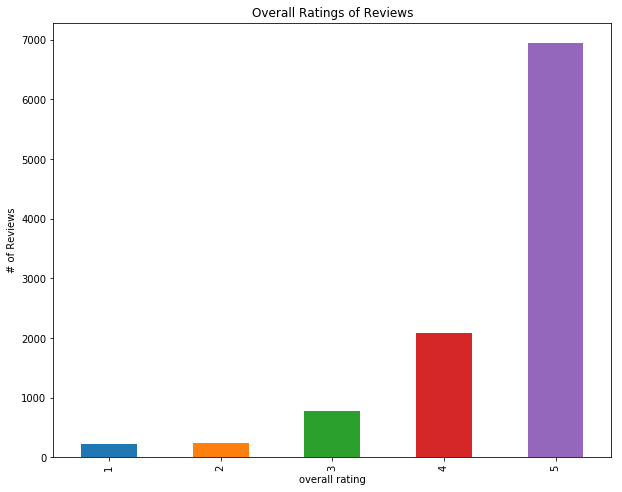

In [8]:
# Visualization of the review distribution based on the rating
df['overall'].value_counts().sort_values().plot(kind='bar', figsize=(10,8))
plt.title('Overall Ratings of Reviews')
plt.ylabel('# of Reviews')
plt.xlabel('overall rating')
plt.show()

From the description and visualization of the dataset, its obvious we have far more '5' and '4' point rating than any other rating which can make the dataset quite imbalanced.

This indicates the reviews are more positive than negative

Lets remove any neutral rating. A rating of 3 would be considered a neutral rating.

Ratings of 4 and 5 would be considered a positive rating

Ratings of 1 and 2 would be considered a negative rating

In [9]:
# Drop missing values
df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
df = df[df['overall'] != 3]

# Encode 4s and 5s as 1 (rated positively)
# Encode 1s and 2s as 0 (rated negatively)
df['rating'] = np.where(df['overall'] > 3, 1, 0)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating
0,1384719342,"[0, 0]",5,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600,1
1,1384719342,"[13, 14]",5,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000,1
2,1384719342,"[1, 1]",5,The primary job of this device is to block the...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000,1
3,1384719342,"[0, 0]",5,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000,1
4,1384719342,"[0, 0]",5,This pop filter is great. It looks and perform...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800,1


Negative Rating: 465
Positive Rating: 8998
Proportion: 0.05 : 1


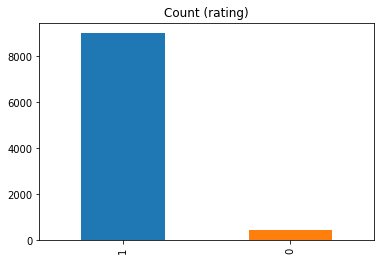

In [15]:
# Visualization of the positive versus negative reviews

rating_count = df.rating.value_counts()
print('Negative Rating:', rating_count[0])
print('Positive Rating:', rating_count[1])
print('Proportion:', round(rating_count[0] / rating_count[1], 2), ': 1')

rating_count.plot(kind='bar', title='Count (rating)');

We now have 8998 reviews that are positive and 465 reviews that are negative

### Histogram of text length of Reviews

Finding correlation between the length of the positive and negative reviews

In [16]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

# Apply the function to each review

df['length'] = df['reviewText'].apply(length)
df.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating,length
0,1384719342,"[0, 0]",5,"Not much to write about here, but it does exac...","02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600,1,268
1,1384719342,"[13, 14]",5,The product does exactly as it should and is q...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000,1,544
2,1384719342,"[1, 1]",5,The primary job of this device is to block the...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000,1,436
3,1384719342,"[0, 0]",5,Nice windscreen protects my MXL mic and preven...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000,1,206
4,1384719342,"[0, 0]",5,This pop filter is great. It looks and perform...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800,1,159


In [17]:
# Creating features for positive and negative reviews

positive_review = df[df['rating'] == 1]
negative_review = df[df['rating'] == 0]


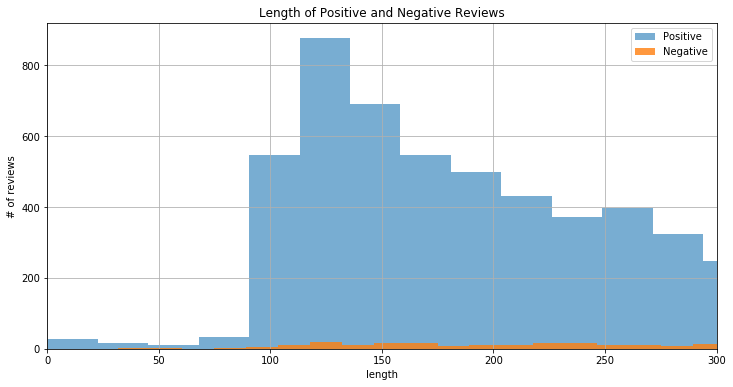

In [18]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 500
plt.hist(positive_review['length'], alpha = 0.6, bins=bins, label='Positive')
plt.hist(negative_review['length'], alpha = 0.8, bins=bins, label='Negative')
plt.xlabel('length')
plt.ylabel('# of reviews')
plt.title('Length of Positive and Negative Reviews')
plt.legend(loc='upper right')
plt.xlim(0,300)
plt.grid()
plt.show()

From the histogram you can tell the positive reviews are much longer than the negative reviews.

# Topic modeling

Topic Modeling is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. Topic Models are very useful for multiple purposes, including:

Document clustering

Organizing large blocks of textual data

Information retrieval from unstructured text

Feature selection

The goal here is to extract a certain number of groups of important words from the reviews. These groups of words are basically the topics which would help in ascertaining what the consumers are actually talking about in the reviews.

### Data Preprocessing

Data preprocessing and cleaning is an important step before any text mining task, in this step, we will remove the punctuations, stopwords and normalize the reviews as much as possible. After every preprocessing step, it is a good practice to check the most frequent words in the data. Therefore, let’s define a function that would plot a bar graph of n most frequent words in the data.

In [19]:
import nltk
from nltk import FreqDist

import gensim
from gensim import corpora

import pyLDAvis
import pyLDAvis.gensim

In [20]:
# Lets create a function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

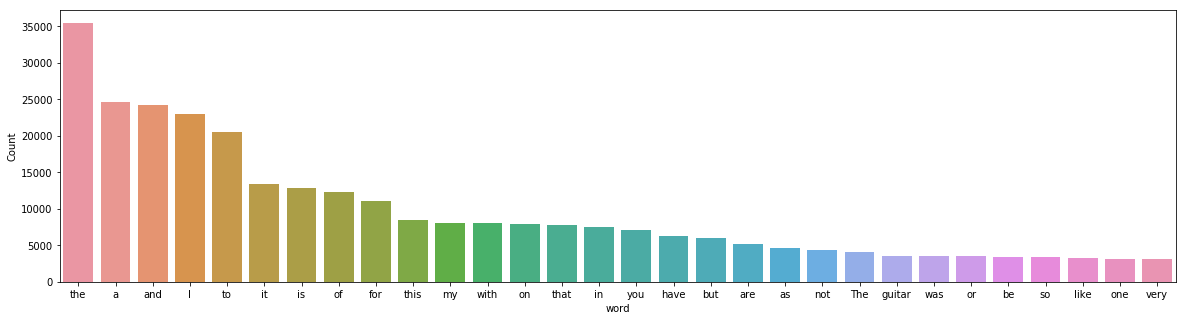

In [21]:
freq_words(df['reviewText'])

Most common words are ‘the’, ‘a’, ‘and’, so on and so forth. These words are not so important for our task and they do not tell any story. We’ have to get rid of these kinds of words. Before that let’s remove the punctuations and numbers from our text data.

In [22]:
# Lets remove unwanted characters, numbers and symbols
df['reviewText'] = df['reviewText'].str.replace("[^a-zA-Z#]", " ")

#### Remove Stopwords

In [23]:
# Let’s try to remove the stopwords and short words (<2 letters) from the reviews.

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df['reviewText']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

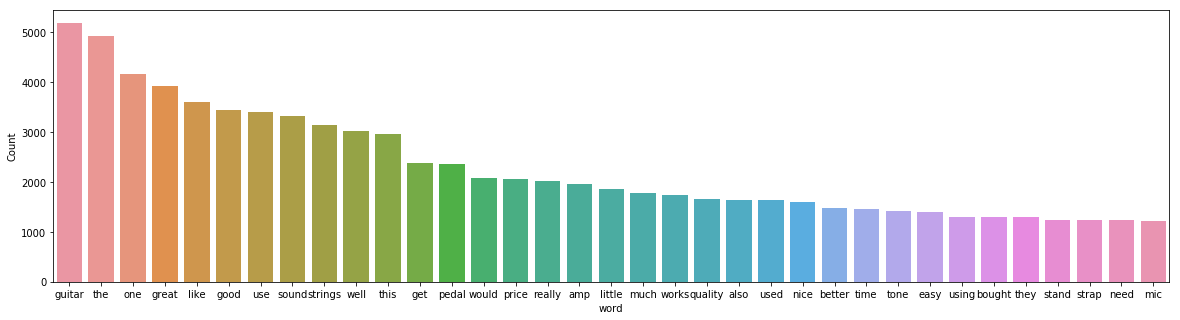

In [24]:
# Let’s again plot the most frequent words and see if the more significant words have come out.
freq_words(reviews, 35)

We can see some improvement here. Terms like ‘guitar’, ‘the’, ‘one’, ‘great’ have come up which are quite relevant for the Musical equipment category. However, we still have neutral terms like ‘the’, ‘use’, ‘get’, ‘also’ which are not that relevant.

####  Lemmatization

To further remove noise from the text we can use lemmatization from the spaCy library. It reduces any given word to its base form thereby reducing multiple forms of a word to a single word.

In [26]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

C:\Users\femis\Anaconda3\lib\site-packages\thinc\neural\train.py:7: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working

C:\Users\femis\Anaconda3\lib\site-packages\thinc\check.py:4: DeprecationWarning:

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working



#### Tokenize

Let’s tokenize the reviews and then lemmatize the tokenized reviews

In [27]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['the', 'product', 'exactly', 'quite', 'affordable', 'realized', 'double', 'screened', 'arrived', 'even', 'better', 'expected', 'added', 'bonus', 'one', 'screens', 'carries', 'small', 'hint', 'smell', 'old', 'grape', 'candy', 'used', 'buy', 'reminiscent', 'sake', 'cannot', 'stop', 'putting', 'pop', 'filter', 'next', 'nose', 'smelling', 'recording', 'dif', 'needed', 'pop', 'filter', 'work', 'well', 'expensive', 'ones', 'may', 'even', 'come', 'pleasing', 'aroma', 'like', 'mine', 'buy', 'product']


In [28]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1]) # print lemmatized review

['product', 'affordable', 'double', 'screened', 'bonus', 'screen', 'small', 'hint', 'smell', 'old', 'grape', 'candy', 'reminiscent', 'sake', 'pop', 'filter', 'next', 'nose', 'recording', 'dif', 'pop', 'filter', 'work', 'expensive', 'one', 'aroma', 'product']


As you can see, we have not just lemmatized the words but also filtered only nouns and adjectives. Let’s de-tokenize the lemmatized reviews and plot the most common words.

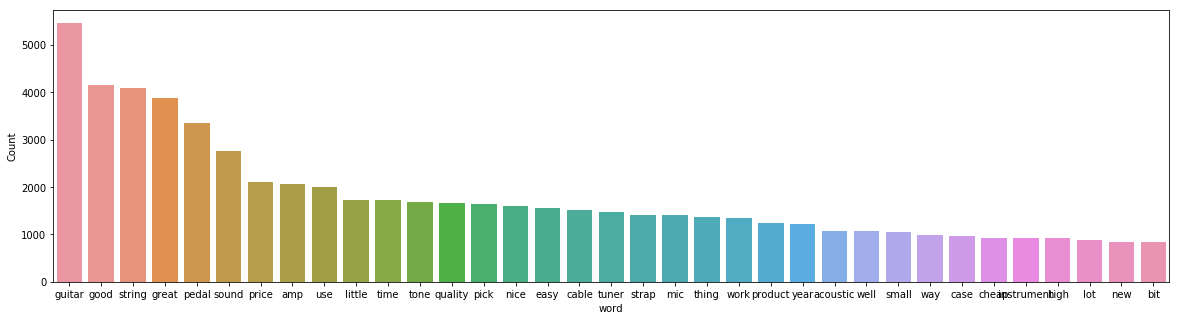

In [29]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))

df['reviews'] = reviews_3

freq_words(df['reviews'], 35)

It seems that now most frequent terms in our data are relevant. We can now go ahead and start building our topic model.

But first lets also represent the most frequent terms in a WordCloud.

#### WordCloud

(-0.5, 399.5, 199.5, -0.5)

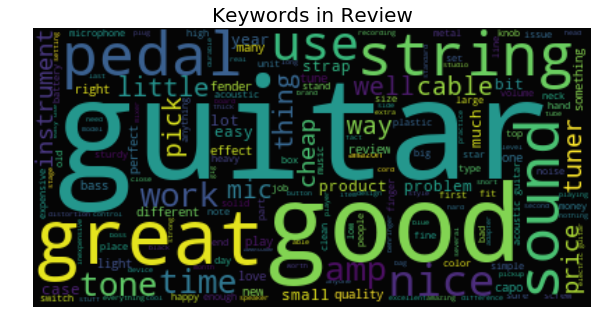

In [30]:
# to create our wordclouds, I will import the python module "wordcloud"

from wordcloud import WordCloud

# The wordcloud of Reviews in the dataset
plt.figure(figsize=(10,7))
wordcloud = WordCloud(background_color="black", max_words=10000, 
               max_font_size= 100)
wordcloud.generate(" ".join(df.reviews))
plt.title("Keywords in Review", fontsize=20)
plt.imshow(wordcloud.recolor(random_state=17), alpha=0.98, interpolation='bilinear')
plt.axis('off')

## LDA Model

Lets start by creating the term dictionary of our corpus, where every unique term is assigned an index

In [31]:
dictionary = corpora.Dictionary(reviews_2)

# convert the list of reviews (reviews_2) into a Document Term Matrix using the dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [32]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model with 7 topics
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100)
         

In [33]:
# Let’s print out the topics that our LDA model has learned.

lda_model.print_topics()

[(0,
  '0.059*"pedal" + 0.033*"amp" + 0.019*"tone" + 0.017*"sound" + 0.012*"effect" + 0.011*"great" + 0.011*"power" + 0.010*"good" + 0.010*"tube" + 0.009*"distortion"'),
 (1,
  '0.027*"pick" + 0.025*"guitar" + 0.021*"great" + 0.019*"good" + 0.013*"case" + 0.010*"sound" + 0.010*"string" + 0.009*"product" + 0.008*"price" + 0.008*"use"'),
 (2,
  '0.031*"cable" + 0.029*"great" + 0.025*"good" + 0.019*"price" + 0.019*"quality" + 0.011*"sound" + 0.010*"guitar" + 0.009*"nice" + 0.008*"product" + 0.008*"use"'),
 (3,
  '0.042*"guitar" + 0.038*"tuner" + 0.015*"easy" + 0.014*"strap" + 0.013*"tune" + 0.011*"capo" + 0.011*"use" + 0.010*"good" + 0.010*"little" + 0.010*"instrument"'),
 (4,
  '0.025*"mic" + 0.014*"microphone" + 0.012*"good" + 0.010*"usb" + 0.009*"use" + 0.009*"great" + 0.008*"display" + 0.008*"recording" + 0.008*"sound" + 0.008*"guitar"'),
 (5,
  '0.024*"time" + 0.018*"guitar" + 0.015*"little" + 0.014*"violin" + 0.012*"pick" + 0.011*"jam" + 0.010*"nice" + 0.009*"thing" + 0.008*"strap" 

Based on topics 1 and 6 terms like guitar, strap and tuner inidcate the music instrument that is being reviewed is a guitar. Topics 3 and 5 seems to refer to the overall quality which terms like good and great.

## Visualization

To visualize our topics in a 2-dimensional space we will use the pyLDAvis library. This visualization is interactive in nature and displays topics along with the most relevant words.

In [34]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.204591 -0.071306       1        1  21.239887
3     -0.079015  0.044670       2        1  18.046869
6     -0.066025  0.022875       3        1  14.542779
2      0.031158  0.046946       4        1  14.506902
1     -0.024693 -0.031772       5        1  14.222222
4      0.040957  0.109242       6        1  13.372315
5     -0.106974 -0.120655       7        1   4.069026, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
158   Default  3415.000000       pedal  3415.000000  30.0000  30.0000
519   Default  3557.000000      string  3557.000000  29.0000  29.0000
108   Default  2029.000000         amp  2029.000000  28.0000  28.0000
82    Default  1199.000000       cable  1199.000000  27.0000  27.0000
1668  Default  2176.000000       tuner  2176.000000  26.0000  26.0000
972   Default  1241.000000        pick  1241.000000  25.0000  25.0000
101   Default  5128.000000      guitar  5128.000000  24.0000  24.0000
59    Default  1109.000000         mic  1109.000000  23.0000  23.0000
105   Default  1754.000000        time  1754.000000  22.0000  22.0000
1642  Default  1042.000000       strap  1042.000000  21.0000  21.0000
341   Default   575.000000  microphone   575.000000  20.0000  20.0000
722   Default  1708.000000        tone  1708.000000  19.0000  19.0000
1469  Default   601.000000        capo   601.000000  18.0000  18.0000
41    Default  1754.000000      little  1754.000000  17.0000  17.0000
950   Default  1043.000000        tune  1043.000000  16.0000  16.0000
2783  Default   349.000000         usb   349.000000  15.0000  15.0000
351   Default   565.000000        tube   565.000000  14.0000  14.0000
749   Default   513.000000  distortion   513.000000  13.0000  13.0000
66    Default  3672.000000       great  3672.000000  12.0000  12.0000
383   Default   834.000000      effect   834.000000  11.0000  11.0000
559   Default   933.000000        case   933.000000  10.0000  10.0000
1004  Default   292.000000     display   292.000000   9.0000   9.0000
4     Default  2059.000000       price  2059.000000   8.0000   8.0000
441   Default   226.000000         jam   226.000000   7.0000   7.0000
2507  Default   530.000000       snark   530.000000   6.0000   6.0000
2633  Default   171.000000      violin   171.000000   5.0000   5.0000
801   Default   734.000000       power   734.000000   4.0000   4.0000
174   Default  1634.000000     quality  1634.000000   3.0000   3.0000
2200  Default   345.000000        joyo   345.000000   2.0000   2.0000
2111  Default   369.000000   overdrive   369.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
1732   Topic7    50.562748        jazz   148.583710   2.1238  -5.3433
1957   Topic7    19.308893         dig    29.226891   2.7872  -6.3060
2020   Topic7    22.228926       leave    40.260956   2.6078  -6.1651
972    Topic7   128.932816        pick  1241.764282   0.9368  -4.4072
41     Topic7   153.559631      little  1754.036133   0.7662  -4.2324
4884   Topic7    32.801285      hanger    85.604980   2.2425  -5.7761
1783   Topic7    40.619690        edge   139.344666   1.9691  -5.5623
399    Topic7    49.897591       thick   223.374664   1.7029  -5.3566
101    Topic7   192.741608      guitar  5128.503906  -0.0795  -4.0052
60     Topic7   104.411545        nice  1480.600586   0.5499  -4.6182
172    Topic7    69.316231        long   611.887146   1.0239  -5.0279
1642   Topic7    84.149078       strap  1042.566162   0.6849  -4.8339
64     Topic7    92.636093       thing  1412.898438   0.4770  -4.7379
754    Topic7    41.107758       order   196.671555   1.6364  -5.5503
742    Topic7    27.363111        wear    70.765091   2.2516  -5.9573
4      Topic7    79.103683       price  2059.298828  -0.0576  -4.8958
43     Topic7    28.072662        mike   

Topic modeling is one of the most popular NLP techniques with several real-world applications such as dimensionality reduction, text summarization, recommendation engine, etc

## Sentiment Analysis

Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts.
This is usually used on customer reviews in order to automatically understand if some users are positive or negative and why. The goal of this project is to show how sentiment analysis can be performed using python. Here are some of the main libraries we will use:


In [65]:

# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df['sentiments'] = df['reviewText'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)


In [66]:
# add number of characters column
df['nb_chars'] = df['reviewText'].apply(lambda x: len(x))

# add number of words column
df['nb_words'] = df['reviewText'].apply(lambda x: len(x.split(" ")))

#### Create doc2vec vector columns

In [67]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['reviews'].apply(lambda x: x.split(" ")))]

# Lets train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df['reviews'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)


In [68]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df['reviews']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ['word_' + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

In [69]:
# Show Ratings distribution
df['rating'].value_counts(normalize = True)

1    0.950861
0    0.049139
Name: rating, dtype: float64

As we already know, Our dataset is highly imbalanced because less than 5% of our reviews are considered as negative ones. This information will be very useful for the modelling part.

In [71]:
# highest positive sentiment reviews (with more than 5 words)
df[df['nb_words'] >= 5].sort_values('pos', ascending = False)[['reviews', 'pos']].head(10)


,reviews,pos
5945,nice good fine great fantastic love nice good ...,0.956
7509,nice awesome cool ido love,0.755
1481,great great great great great great great grea...,0.746
7605,great strap nice comfort nice pricefit nice fe...,0.717
666,love thing action great sound good easy play r...,0.716
7934,great microphone good rice,0.709
2519,excellent product strong work excellent condit...,0.703
2854,excellent string beautiful solid tone buzzing,0.697
10256,great thank,0.688
1192,easy pack easy instrument light weight sturdy ...,0.683


The most positive reviews indeed correspond to some good feedbacks.



In [77]:
# lowest negative sentiment reviews (with more than 5 words)
df[df['nb_words'] >= 5].sort_values('neg', ascending = False)[['reviews', 'neg']].head(10)


,reviews,neg
2424,cable less month disappointed quality,0.466
1781,problem able use abuse,0.433
8802,tank couple week time trouble shoot sure compo...,0.433
8553,dull inept version tubescreamer flat,0.397
7165,gig frustrating guess pay,0.387
3697,good nothing special couple review bad smell b...,0.365
9101,cool large inconvenient blue yeti,0.364
5441,good ideal big problem tube amp twin reverb fe...,0.362
9697,dull uninspiring pedal don waste time boss dig...,0.362
3664,bad brother guitar year,0.355


#### Lets plot sentiment distribution for positive and negative reviews

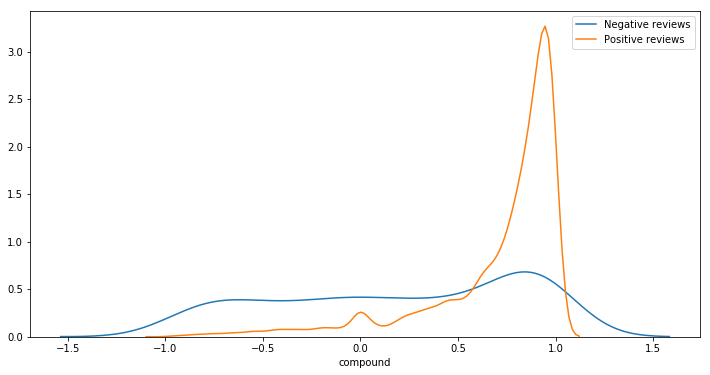

In [76]:
import seaborn as sns

for x in [0, 1]:
    subset = df[df['rating'] == x]
    
    # Draw the density plot
    if x == 1:
        label = 'Positive reviews'
    else:
        label = 'Negative reviews'
    sns.distplot(subset['compound'], hist = False, label = label)

The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. We can see that good reviews are for most of them considered as very positive by Vader.

## Oversampling to eliminate bias

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

In this case, we would over-sample because under-sampling can cause loss of information because we have so few reviews with negative rating.

In [78]:
# Determine the max size of the larger rating group
max_size = df['rating'].value_counts().max()

In [79]:
max_size
print('Max size of the rating:', max_size)

Max size of the rating: 8998


In [89]:
# Lets do some oversampling to take care of the clas imbalance and create a subset.
lst = [df]
for class_index, group in df.groupby('rating'):
    lst.append(group.sample(max_size-len(group), replace=True))
df_subset = pd.concat(lst)
df_subset.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating,...,word_yamaha,word_year,word_yellow,word_yesterday,word_yeti,word_young,word_youtube,word_zipper,word_zone,word_zoom
0,1384719342,"[0, 0]",5,Not much write about here but does exactly wha...,"02 28, 2014",A2IBPI20UZIR0U,"cassandra tu ""Yeah, well, that's just like, u...",good,1393545600,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1384719342,"[13, 14]",5,The product does exactly should and quite affo...,"03 16, 2013",A14VAT5EAX3D9S,Jake,Jake,1363392000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1384719342,"[1, 1]",5,The primary job this device block the breath t...,"08 28, 2013",A195EZSQDW3E21,"Rick Bennette ""Rick Bennette""",It Does The Job Well,1377648000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1384719342,"[0, 0]",5,Nice windscreen protects MXL mic and prevents ...,"02 14, 2014",A2C00NNG1ZQQG2,"RustyBill ""Sunday Rocker""",GOOD WINDSCREEN FOR THE MONEY,1392336000,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1384719342,"[0, 0]",5,This pop filter great looks and performs like ...,"02 21, 2014",A94QU4C90B1AX,SEAN MASLANKA,No more pops when I record my vocals.,1392940800,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
# Number of positive and neative reviews after the oversampling
df_subset['rating'].value_counts()

1    8998
0    8998
Name: rating, dtype: int64

Negative Rating: 8998
Positive Rating: 8998
Proportion: 1.0 : 1


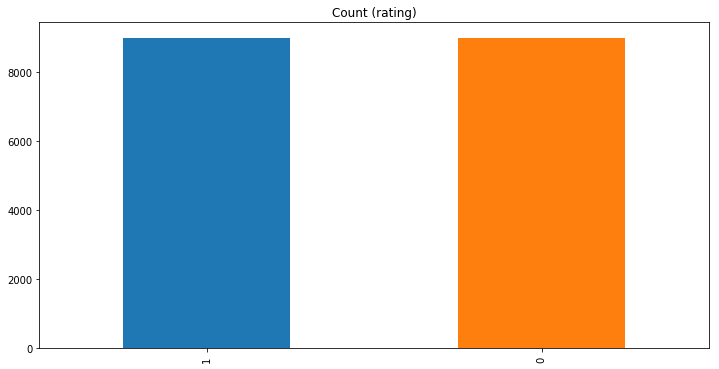

In [90]:
# Lets plot the ratings after the oversampling

rating_count = df_subset.rating.value_counts()

print('Negative Rating:', rating_count[0])
print('Positive Rating:', rating_count[1])
print('Proportion:', round(rating_count[0] / rating_count[1], 2), ': 1')

rating_count.plot(kind='bar', title='Count (rating)');

In [93]:
# Lets trim down the subset to the values we would focus on. The review and ratings
df_subset = df_subset[['reviewText','rating']]
df_subset.head()

,reviewText,rating
0,Not much write about here but does exactly wha...,1
1,The product does exactly should and quite affo...,1
2,The primary job this device block the breath t...,1
3,Nice windscreen protects MXL mic and prevents ...,1
4,This pop filter great looks and performs like ...,1


## Modeling 

Several modeling techniques would be used to determine which model produces the best results

#### Multinomial Naive Bayes 

In this model we will create a feature using CountVectorizer

In [94]:
# generate document term matrix by using scikit-learn's CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
vect = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= vect.fit_transform(df_subset['reviewText'])

In [95]:
from sklearn.model_selection import train_test_split
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(text_counts,
                                                    df_subset['rating'], test_size=0.3, random_state=1)

In [96]:
# fit your model on a train set using fit() and perform prediction on the test set using predict().

from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9525838118170031


We got a classification rate of 95% using CountVector(or BoW), which is considered as pretty good accuracy.

#### Multinomial Naive Bayes

In this model we will create a feature using TF-IDF

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(df_subset['reviewText'])

In [98]:
# Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(text_tf,
                                                    df_subset['rating'], test_size=0.3, random_state=1)

In [99]:
# Model Building and Evaluation (TF-IDF)
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.9511020559362845


We got a classification rate of 95% usingTF-IDF, which is considered as pretty good accuracy.

#### Conducting a Logistic Regression

We are going to train test and split the newly created over-sampled dataset

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_subset['reviewText'],
                                                    df_subset['rating'], test_size=0.3, random_state=1)

print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 12597
Length of X_test is: 5399
Length of y_train is: 12597
Length of y_test is: 5399


In [101]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

38792

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('ROC_AUC: ', roc_auc_score(y_test, predictions))

ROC_AUC:  0.9957720588235295


We have a receiver operating characteristic score of 99.6%

In [103]:
# Lets get the F1 score and the recall score
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, predictions), 2)
recall_score = round(recall_score(y_test, predictions), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.99
F1 Score for Logistic Regression Model 1 : 1.0


## Confusion matrix

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 1 entries were erroneously predicted as class 0.

Therefore, the higher the diagonal values of the confusion matrix the better, indicating many correct predictions

Confusion matrix:
 [[2679    0]
 [  23 2697]]


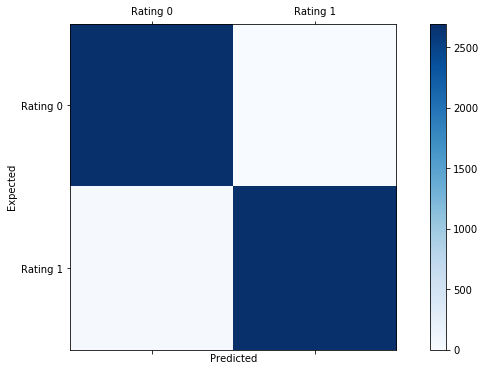

In [104]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=predictions)
print('Confusion matrix:\n', conf_mat)

labels = ['Rating 0', 'Rating 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

There are 5379 reviews that are accurately classified and 23 reviews that are shown as False Negatives 

## Using Undersampling for comparison

In [57]:
# Find Number of samples which are Fraud
p_rating = len(df[df['rating'] == 0])
# Get indices of non fraud samples
p_rating_indices = df[df.rating == 1].index
# Random sample non fraud indices
random_indices = np.random.choice(p_rating_indices,p_rating, replace=False)
#Find the indices of fraud samples
n_rating_indices = df[df.rating == 0].index
# Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([n_rating_indices,random_indices])
#Get Balance Dataframe
under_sample = df.loc[under_sample_indices]
under_sample.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,rating,length,reviews
15,B00005ML71,"[0, 0]",2,bought this use with keyboard wasn really awar...,"08 17, 2013",A2PD27UKAD3Q00,"Wilhelmina Zeitgeist ""coolartsybabe""",Definitely Not For The Seasoned Piano Player,1376697600,0,623,use keyboard aware option pedal acoustic piano...
50,B000068NW5,"[2, 2]",2,didn expect this cable thin easily the thickne...,"07 6, 2011",A12ABV9NU02O29,C. Longo,Cannot recommend,1309910400,0,387,cable thin thickness guitar cable sure long te...
52,B000068NW5,"[0, 0]",1,hums crackles and think having problems with e...,"02 9, 2014",A1L7M2JXN4EZCR,David G,I have bought many cables and this one is the ...,1391904000,0,245,hum crackle problem equipment cord problem hos...
89,B000068NW5,"[0, 0]",1,pro cheapo and hated this thing They noisy and...,"03 14, 2014",A3UD50M7M72150,synthezatory,Crap,1394755200,0,145,pro cheapo thing cable cheap gummy drop buck s...
98,B000068NZC,"[0, 0]",2,bought this for Canon Vixia Video Camera and S...,"09 16, 2013",A1W3CEEQBJ4GTN,S. Marchuk,Measure your damned wires before sending them...,1379289600,0,974,canon vixia video camera shotgun mic wire perf...


Negative Rating : 465
Positive Rating : 465
Proportion: 1.0 : 1


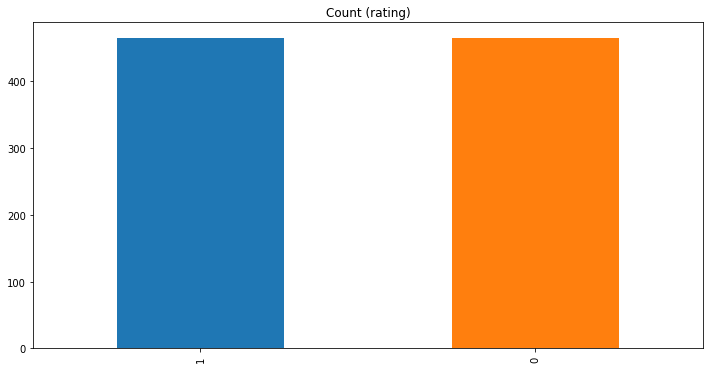

In [58]:
rating_count_under = under_sample.rating.value_counts()

print('Negative Rating :', rating_count_under[0])
print('Positive Rating :', rating_count_under[1])
print('Proportion:', round(rating_count_under[0] / rating_count_under[1], 2), ': 1')

rating_count_under.plot(kind='bar', title='Count (rating)');

In [59]:
from sklearn.model_selection import train_test_split

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(under_sample['reviewText'],
                                                    under_sample['rating'], test_size=0.3, random_state=1)

print("Length of X_train is: {X_train_under}".format(X_train_under = len(X_train_under)))
print("Length of X_test is: {X_test_under}".format(X_test_under = len(X_test_under)))
print("Length of y_train is: {y_train_under}".format(y_train_under = len(y_train_under)))
print("Length of y_test is: {y_test_under}".format(y_test_under = len(y_test_under)))

Length of X_train is: 651
Length of X_test is: 279
Length of y_train is: 651
Length of y_test is: 279


In [60]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized_under= vect.transform(X_train_under)

len(vect.get_feature_names())

38787

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model_under = LogisticRegression()
model_under.fit(X_train_vectorized_under, y_train_under)

predictions_under = model_under.predict(vect.transform(X_test_under))

print('ROC_AUC: ', roc_auc_score(y_test_under, predictions_under))

ROC_AUC:  0.7997214772023933


In [62]:
from sklearn.metrics import f1_score, recall_score
f1_score_under = round(f1_score(y_test_under, predictions_under), 2)
recall_score_under = round(recall_score(y_test_under, predictions_under), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score_under}".format(recall_score_under = recall_score_under))
print("F1 Score for Logistic Regression Model 1 : {f1_score_under}".format(f1_score_under = f1_score_under))

Sensitivity/Recall for Logistic Regression Model 1 : 0.85
F1 Score for Logistic Regression Model 1 : 0.82


As anticipated, under sampling causes loss of information because we have so few reviews with negative rating. This is reflected in the ROC score is 80%, and a Recall and F1 score of 0.85 and 0.82 respectively. 

### Confusion Matrix for the Undersampled Dataset

Confusion matrix:
 [[ 98  33]
 [ 22 126]]


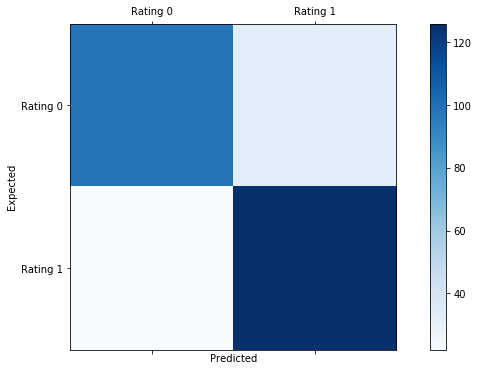

In [63]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test_under, y_pred=predictions_under)
print('Confusion matrix:\n', conf_mat)

labels = ['Rating 0', 'Rating 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

There are 224 reviews that are accurately classified and 55 reviews are improperly classified. About a third of the prediction is incorrect.

## Conclusion

Online product reviews are a great source of information. From the business/sellers’ point of view. Online reviews can be used to gauge the consumers’ feedback on the products or services they are selling. However, since these online reviews are quite often overwhelming in terms of numbers and information, an intelligent system, capable of finding key insights (topics) from these reviews, will be of great help for both the consumers and the sellers.

We explored the use of data visualization techniques common in data science, such as histograms and pyPlots, to gain a better understanding of the underlying distribution of data in our data set.

As demonstrated above, the dataset had reviews of a musical euipment which included a guitar, microphone and possibly an amp. The sentiment of the the reviews were mostly possitive, and the positive reviews were longer in text than negative reviews.

When modeling a dataset with highly unbalanced classes such as this, the classifier always "predicts" the most common class without performing any analysis of the features, which will have a high accuracy rate, which is obviously inaccurate. Oversampling and undersampling was done to determine which would produce a more reliable accuracy rate. As one would predict, oversampling produced the better scores using metrics suchs as precision, recall, and F1-scores, as well as confusion matrix.